This notebook aims to simulate a decision-making paradigm in the macaque A1. 
The backbone of the project is to first create a task that acts as input for our model. 
This task 
2 different stimulus with different properties in A1 that will let the macaque (i.e the simulation) to decide 
This require few major step : 
a) The choice of 


In [1]:
%%capture --no-display
import os
from custom_simulation import CustomSimulation
from surface_preparer import SurfacePreparer
from connectome_editor import ConnectomeEditor

# Init data saving folder:
SAVE_FOLDER = './result/v2'
ROOT_FOLDER = os.getcwd()
try:
    os.listdir(SAVE_FOLDER)
except:
    os.mkdir(SAVE_FOLDER)

## Run a first simulation of 2 stimulus with different strength in A1

In [2]:
# Define variables of interests
stimvals = [1e-3, 2] # Stimulus strengths

# A2 takes A1 as input hence not taken into account for now
stim_region = {'A1_R': 'Primary auditory cortex'} 

surface = SurfacePreparer(SAVE_FOLDER)
# Create and init a simulator
# Default b_value = 5 and interstim_t = 1e9 so that we simulate only one stimulus
customSim = CustomSimulation(SAVE_FOLDER, surface, stim_region, stimvals)

# Run the simulation
#customSim.main_simulation_loop() 

## Output in the Right Dorsolateral Prefrontal Cortex

... loading file: b5_stim0.001_T1000000000.0_A1_R
... loading file: b5_stim2_T1000000000.0_A1_R


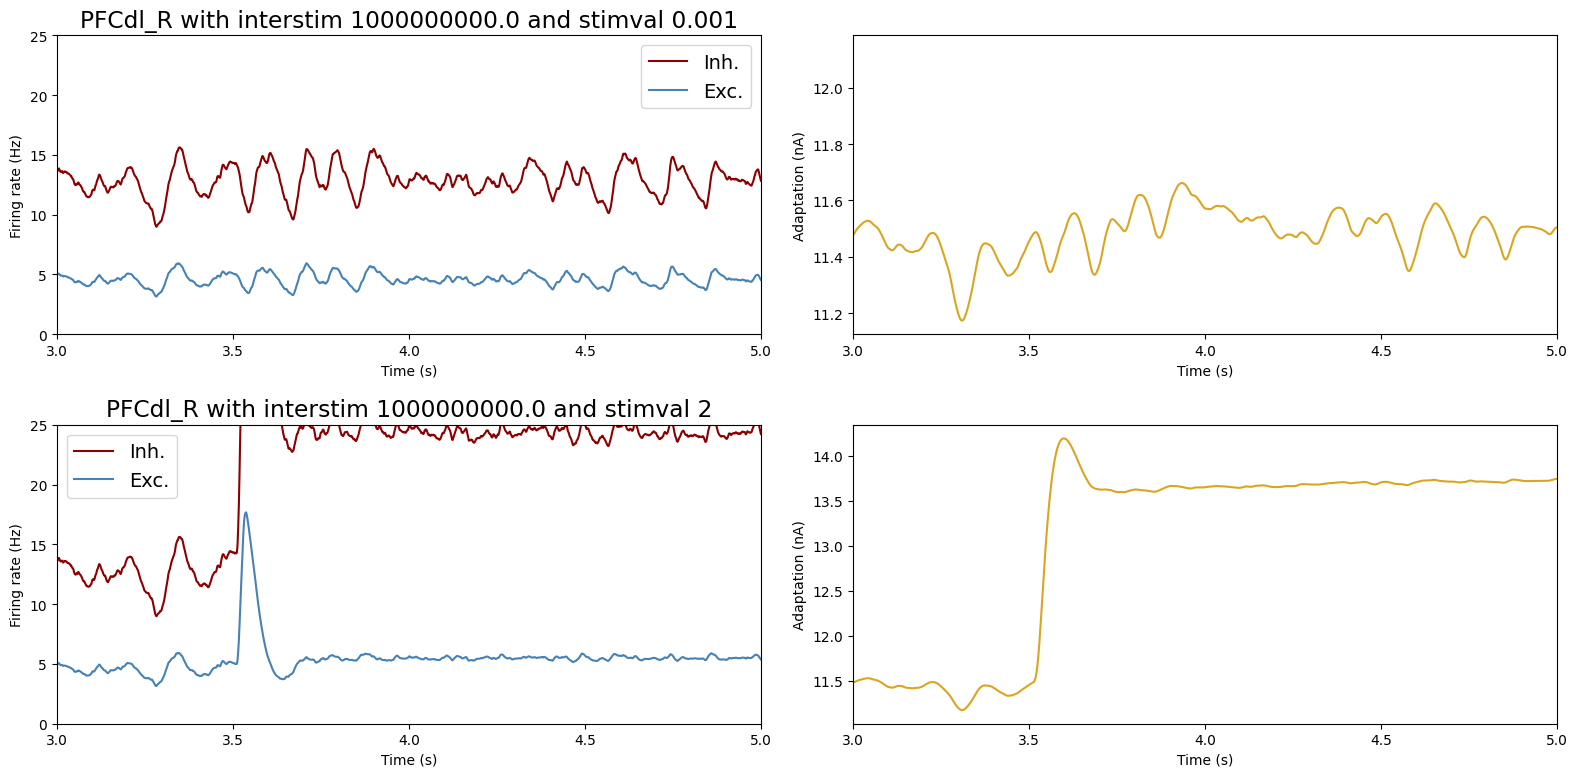

In [3]:
# Load simulation variables
customSim.load_simulation() 

# Target region where to observe the influence of the stim from stim_region
# 'PFCdl' and 'PFCvl' gave both good results at giving distinct outputs given different stimulus strength
target_region = 'PFCdl_R'
#target_region = 'PFCvl_R'

# Plot simulation
customSim.plot_simulation(target_region) 

## Modify the Connectome to create 2 cortical columns in PFCdl_R

### Practically, row/column in which PFCdl_R occurs are duplicated and all the associated weighths are divided by  2 and are called PFCdl_R_a and PFC_dl_R_b.

In [4]:
PFCdl_index = surface.id_finder('PFCdl_R')  

connectivity_to_edit = ROOT_FOLDER + '/tvb_model_reference/data/macaque/Connectivity2/'

new_connectivity_file_name = "Connectivity_mod3"
new_connectivity_path = ROOT_FOLDER + f'/tvb_model_reference/data/macaque/{new_connectivity_file_name}/'


connectome_editor = ConnectomeEditor(surface, connectivity_to_edit, new_connectivity_path)
weigths, _, _ = connectome_editor.get_features()
print(weigths[PFCdl_index-3:PFCdl_index+3, PFCdl_index-3:PFCdl_index+3])
print("")
print("")

print("")

connectome_editor.duplicate_region(PFCdl_index)
weigths, _, _ = connectome_editor.get_features()
print(weigths[PFCdl_index-3:PFCdl_index+3, PFCdl_index-3:PFCdl_index+3])
connectome_editor.save_changes()



[[0.         0.29624909 0.00079935 0.00090769 0.01392718 0.00270264]
 [0.29624909 0.         0.0009353  0.00084496 0.02113342 0.00381731]
 [0.00079935 0.0009353  0.         0.13209456 0.06818873 0.14566341]
 [0.00090769 0.00084496 0.13209456 0.         0.02467273 0.04438225]
 [0.01392718 0.02113342 0.06818873 0.02467273 0.         0.21061568]
 [0.00270264 0.00381731 0.14566341 0.04438225 0.21061568 0.        ]]



[[0.         0.29624909 0.00079935 0.00045385 0.00045385 0.01392718]
 [0.29624909 0.         0.0009353  0.00042248 0.00042248 0.02113342]
 [0.00079935 0.0009353  0.         0.06604728 0.06604728 0.06818873]
 [0.00045385 0.00042248 0.06604728 0.         0.         0.01233637]
 [0.00045385 0.00042248 0.06604728 0.         0.         0.01233637]
 [0.01392718 0.02113342 0.06818873 0.01233637 0.01233637 0.        ]]


## Run simulation from the beginning but using the new modified connectome this time.

In [6]:
surface_new = SurfacePreparer(SAVE_FOLDER, con_name = f'{new_connectivity_file_name}.zip')

# Create and init a simulator
# Default b_value = 5 and interstim_t = 1e9 so that we simulate only one stimulus
customSim_new = CustomSimulation(SAVE_FOLDER, surface_new, stim_region, stimvals)

# Run the simulation
customSim_new.main_simulation_loop() 

Stim for 50 ms, 0.001 nS, b_val = 5, interstim 1000000000.0 mS in the A1_R
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
simulation time :5000.0
Stim for 50 ms, 2 nS, b_val = 5, interstim 1000000000.0 mS in the A1_R
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
simulation time :5000.0
Simulation took 290.94 seconds to complete.


## Output in the Right Dorsolateral Prefrontal Cortex in PFCdl_R_a and PFCdl_R_b

... loading file: b5_stim0.001_T1000000000.0_A1_R
... loading file: b5_stim2_T1000000000.0_A1_R


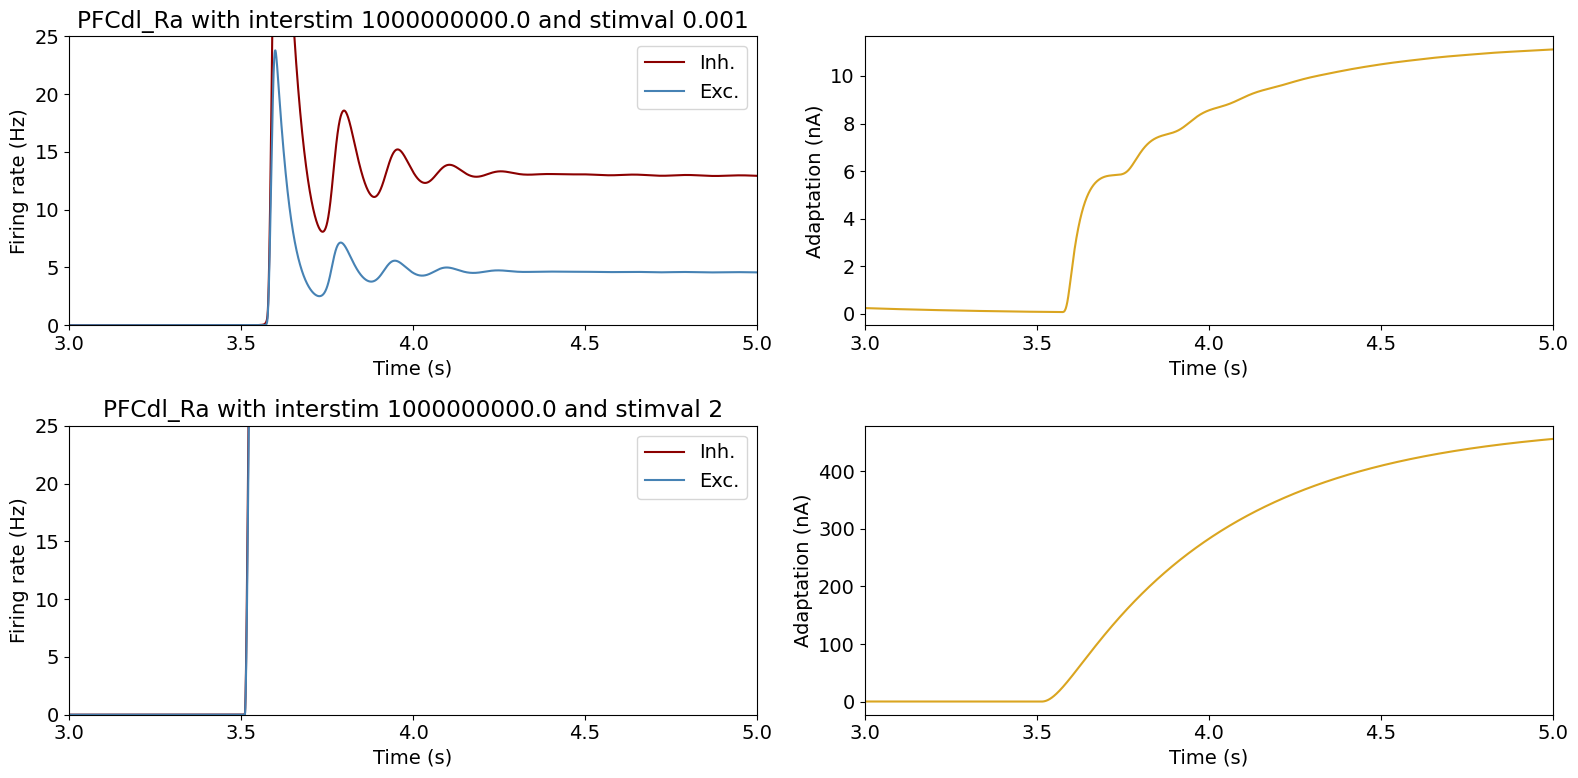

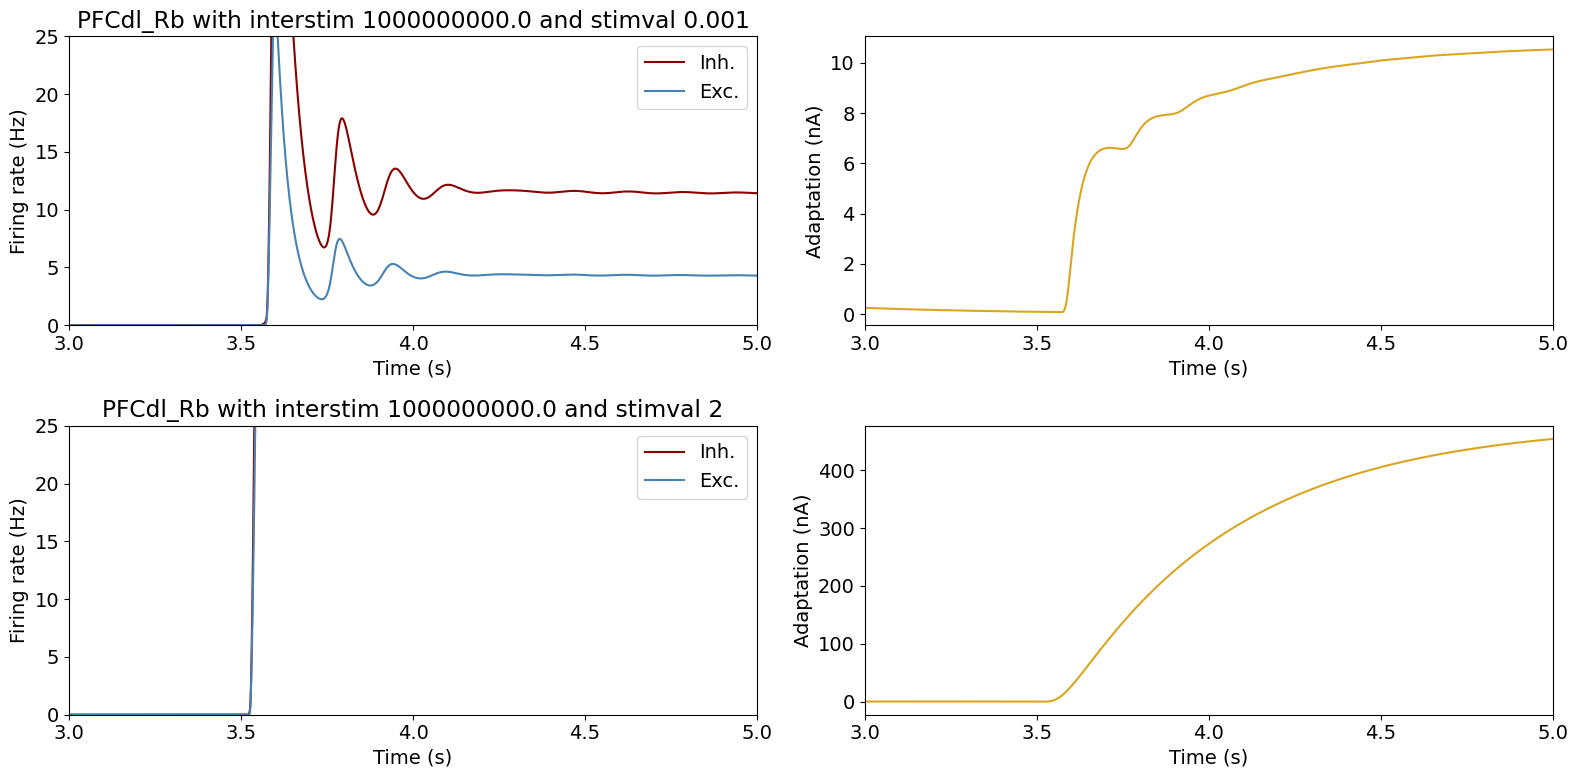

In [7]:
# Load simulation variables
customSim_new.load_simulation() 

# Target region where to observe the influence of the stim from stim_region
target_region_a = 'PFCdl_Ra'
target_region_b = 'PFCdl_Rb'
# Plot simulation
customSim_new.plot_simulation(target_region_a) 
customSim_new.plot_simulation(target_region_b) 

In [ ]:
Im